In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Loading the dataset
data = pd.read_csv("diabetes.csv")

In [6]:
# Set seed for reproducibility
np.random.seed(40)

In [7]:
#Taking random sample of 25 observations
sample = data.sample(25)

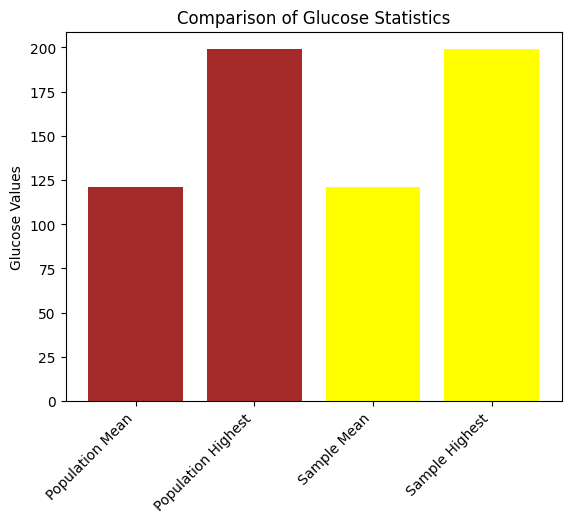

In [8]:
# Calculating mean and highest Glucose values for sample and population
mean_glucose = sample['Glucose'].mean()
highest_glucose = sample['Glucose'].max()
mean_glucose = data['Glucose'].mean()
highest_glucose = data['Glucose'].max()

# Plotting
labels = ['Population Mean', 'Population Highest', 'Sample Mean', 'Sample Highest']
values = [mean_glucose, highest_glucose, mean_glucose, highest_glucose]

plt.bar(labels, values, color=['brown', 'brown', 'yellow', 'yellow'])
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics')
plt.xticks(rotation=45, ha='right')

plt.show()


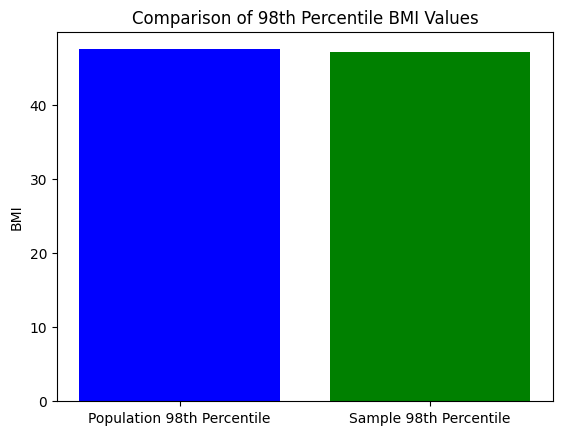

In [9]:
# Calculating 98th percentile of BMI for sample
sample_98thpercentile = np.percentile(sample['BMI'], 98)
# Calculating 98th percentile of BMI for population
population_98thpercentile = np.percentile(data['BMI'], 98)

# Plotting
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_98thpercentile, sample_98thpercentile]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Comparison of 98th Percentile BMI Values')
plt.ylabel('BMI')
plt.show()


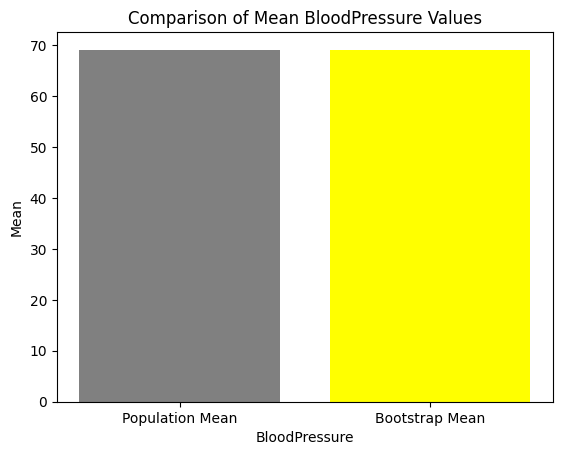

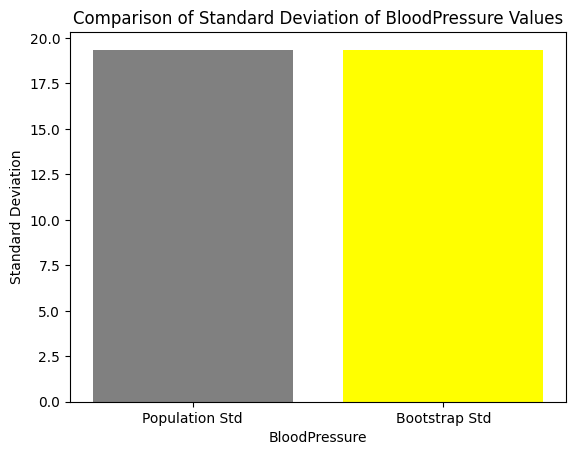

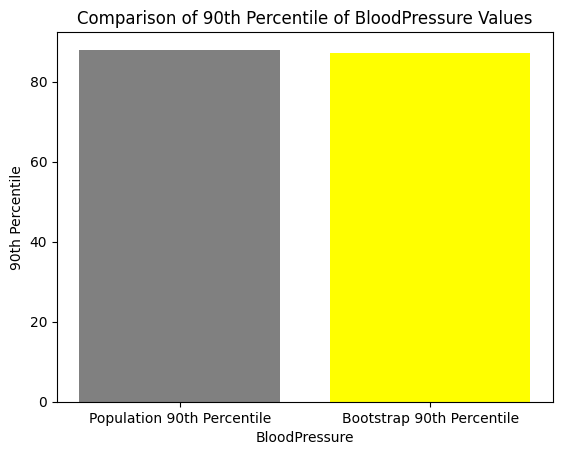

In [10]:
# Function to perform bootstrap
def bootstrap(data, num_samples, sample_size):
    bootstrap_means = []
    bootstrap_stds = []
    bootstrap_percentiles = []
    for i in range(num_samples):
        bootstrap.sample = data.sample(sample_size, replace=True)
        bootstrap_means.append(bootstrap.sample['BloodPressure'].mean())
        bootstrap_stds.append(bootstrap.sample['BloodPressure'].std())
        bootstrap_percentiles.append(np.percentile(bootstrap.sample['BloodPressure'], 90))
    return bootstrap_means, bootstrap_stds, bootstrap_percentiles

# Creating 500 bootstrap samples of size 150 each
bootstrap_means, bootstrap_stds, bootstrap_percentiles = bootstrap(data, 500, 150)

# Calculating population statistics
population_mean_bloodpressure = data['BloodPressure'].mean()
population_std_bloodpressure = data['BloodPressure'].std()
population_percentile_bloodpressure = np.percentile(data['BloodPressure'], 90)

# Plot comparison of mean BloodPressure values
plt.bar(['Population Mean', 'Bootstrap Mean'], [population_mean_bloodpressure, np.mean(bootstrap_means)], color=['gray', 'yellow'])
plt.xlabel('BloodPressure')
plt.ylabel('Mean')
plt.title('Comparison of Mean BloodPressure Values')
plt.show()

# Plot comparison of standard deviation of BloodPressure values
plt.bar(['Population Std', 'Bootstrap Std'], [population_std_bloodpressure, np.mean(bootstrap_stds)], color=['gray', 'yellow'])
plt.xlabel('BloodPressure')
plt.ylabel('Standard Deviation')
plt.title('Comparison of Standard Deviation of BloodPressure Values')
plt.show()

# Plot comparison of 90th percentile of BloodPressure values
plt.bar(['Population 90th Percentile', 'Bootstrap 90th Percentile'], [population_percentile_bloodpressure, np.mean(bootstrap_percentiles)], color=['gray', 'yellow'])
plt.xlabel('BloodPressure')
plt.ylabel('90th Percentile')
plt.title('Comparison of 90th Percentile of BloodPressure Values')
plt.show()
